In [136]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action='ignore') 

In [2]:
df = pd.read_csv('baseball_reference_2016_clean.csv')
df.head()

,Unnamed: 0,attendance,away_team,away_team_errors,away_team_hits,away_team_runs,date,field_type,game_type,home_team,...,temperature,wind_speed,wind_direction,sky,total_runs,game_hours_dec,season,home_team_win,home_team_loss,home_team_outcome
0,0,40030.0,New York Mets,1,7,3,2016-04-03,on grass,Night Game,Kansas City Royals,...,74.0,14.0,from Right to Left,Sunny,7,3.216667,regular season,1,0,Win
1,1,21621.0,Philadelphia Phillies,0,5,2,2016-04-06,on grass,Night Game,Cincinnati Reds,...,55.0,24.0,from Right to Left,Overcast,5,2.383333,regular season,1,0,Win
2,2,12622.0,Minnesota Twins,0,5,2,2016-04-06,on grass,Night Game,Baltimore Orioles,...,48.0,7.0,out to Leftfield,Unknown,6,3.183333,regular season,1,0,Win
3,3,18531.0,Washington Nationals,0,8,3,2016-04-06,on grass,Night Game,Atlanta Braves,...,65.0,10.0,from Right to Left,Cloudy,4,2.883333,regular season,0,1,Loss
4,4,18572.0,Colorado Rockies,1,8,4,2016-04-06,on grass,Day Game,Arizona Diamondbacks,...,77.0,0.0,in unknown direction,In Dome,7,2.650000,regular season,0,1,Loss


In [42]:
mlb_16 = df.drop('Unnamed: 0', axis=1)
mlb_16.head()

,attendance,away_team,away_team_errors,away_team_hits,away_team_runs,date,field_type,game_type,home_team,home_team_errors,...,temperature,wind_speed,wind_direction,sky,total_runs,game_hours_dec,season,home_team_win,home_team_loss,home_team_outcome
0,40030.0,New York Mets,1,7,3,2016-04-03,on grass,Night Game,Kansas City Royals,0,...,74.0,14.0,from Right to Left,Sunny,7,3.216667,regular season,1,0,Win
1,21621.0,Philadelphia Phillies,0,5,2,2016-04-06,on grass,Night Game,Cincinnati Reds,0,...,55.0,24.0,from Right to Left,Overcast,5,2.383333,regular season,1,0,Win
2,12622.0,Minnesota Twins,0,5,2,2016-04-06,on grass,Night Game,Baltimore Orioles,0,...,48.0,7.0,out to Leftfield,Unknown,6,3.183333,regular season,1,0,Win
3,18531.0,Washington Nationals,0,8,3,2016-04-06,on grass,Night Game,Atlanta Braves,1,...,65.0,10.0,from Right to Left,Cloudy,4,2.883333,regular season,0,1,Loss
4,18572.0,Colorado Rockies,1,8,4,2016-04-06,on grass,Day Game,Arizona Diamondbacks,0,...,77.0,0.0,in unknown direction,In Dome,7,2.650000,regular season,0,1,Loss


In [43]:
mlb_16.columns

Index(['attendance', 'away_team', 'away_team_errors', 'away_team_hits',
       'away_team_runs', 'date', 'field_type', 'game_type', 'home_team',
       'home_team_errors', 'home_team_hits', 'home_team_runs', 'start_time',
       'venue', 'day_of_week', 'temperature', 'wind_speed', 'wind_direction',
       'sky', 'total_runs', 'game_hours_dec', 'season', 'home_team_win',
       'home_team_loss', 'home_team_outcome'],
      dtype='object')

In [58]:
mlb_16.iloc[0]

attendance                         40030
away_team                  New York Mets
away_team_errors                       1
away_team_hits                         7
away_team_runs                         3
date                          2016-04-03
field_type                      on grass
game_type                     Night Game
home_team             Kansas City Royals
home_team_errors                       0
home_team_hits                         9
home_team_runs                         4
start_time               7:38 p.m. Local
venue                   Kauffman Stadium
day_of_week                       Sunday
temperature                           74
wind_speed                            14
wind_direction        from Right to Left
sky                                Sunny
total_runs                             7
game_hours_dec                   3.21667
season                    regular season
home_team_win                          1
home_team_loss                         0
home_team_outcom

## 각 팀의 Regular Season 승 수와 승률 계산

In [49]:
mlb_16.season.unique()

array(['regular season', 'post season'], dtype=object)

In [44]:
team = mlb_16[mlb_16['season']=='regular season']

In [45]:
home_win = team.groupby('home_team')[['home_team','home_team_win', 'home_team_loss']].sum()
home_win = home_win.reset_index().rename(columns={'home_team': 'team', 'home_team_win': 'home_win', 'home_team_loss': 'home_loss'})

In [46]:
away_win = team.groupby('away_team')[['away_team','home_team_loss', 'home_team_win']].sum()
away_win = away_win.reset_index().rename(columns={'away_team': 'team', 'home_team_loss': 'away_win', 'home_team_win': 'away_loss'})

In [56]:
team_win = pd.merge(home_win, away_win, on='team')
team_win['total_win'] = team_win['home_win'] + team_win['away_win']
team_win['total_game'] = team_win['home_win'] + team_win['away_win'] + team_win['home_loss'] + team_win['away_loss']
team_win['wpc'] = round(team_win['total_win']/team_win['total_game'],3)
rank = team_win.sort_values('wpc', ascending=False).reset_index().drop('index', axis=1)
rank

,team,home_win,home_loss,away_win,away_loss,total_win,total_game,wpc
0,Chicago Cubs,57,24,46,34,103,161,0.640
1,Washington Nationals,50,31,45,36,95,162,0.586
2,Texas Rangers,53,28,42,39,95,162,0.586
3,Cleveland Indians,53,28,41,39,94,161,0.584
4,Boston Red Sox,47,34,46,35,93,162,0.574
5,Los Angeles Dodgers,53,28,38,43,91,162,0.562
6,Baltimore Orioles,50,31,39,42,89,162,0.549
7,Toronto Blue Jays,46,35,43,38,89,162,0.549
8,New York Mets,44,37,43,38,87,162,0.537
9,San Francisco Giants,45,36,42,39,87,162,0.537


## 각 팀의 Regular Season 득점과 실점 계산

In [63]:
# r: 득점, lr: 실점

home_r = team.groupby('home_team')[['home_team','home_team_runs', 'away_team_runs']].sum()
home_r = home_r.reset_index().rename(columns={'home_team': 'team', 'home_team_runs': 'home_r', 'away_team_runs': 'home_lr'})
away_r = team.groupby('away_team')[['away_team','away_team_runs', 'home_team_runs']].sum()
away_r = away_r.reset_index().rename(columns={'away_team': 'team', 'away_team_runs': 'away_r', 'home_team_runs': 'away_lr'})
team_r = pd.merge(home_r, away_r, on='team')
team_r['total_r'] = team_r['home_r'] + team_r['away_r']
team_r['total_lr'] = team_r['home_lr'] + team_r['away_lr']
team_r

,team,home_r,home_lr,away_r,away_lr,total_r,total_lr
0,Arizona Diamondbacks,411,493,341,397,752,890
1,Atlanta Braves,335,404,314,375,649,779
2,Baltimore Orioles,376,336,368,379,744,715
3,Boston Red Sox,477,380,401,314,878,694
4,Chicago Cubs,389,247,419,309,808,556
5,Chicago White Sox,345,329,341,386,686,715
6,Cincinnati Reds,365,416,351,438,716,854
7,Cleveland Indians,452,347,325,329,777,676
8,Colorado Rockies,508,477,337,383,845,860
9,Detroit Tigers,381,357,369,364,750,721


## 피타고라스 기대치 확인

피타고라스 기대치 공식 = 스포츠 팀의 승률이 (득점^2) / [(득점^2) + (실점^2)] 와 비례한다는 공식

In [67]:
pred = pd.merge(rank[['team','wpc']], team_r[['team', 'total_r', 'total_lr']], on='team')
pred['pyth'] = (pred['total_r']**2) / (pred['total_r']**2 + pred['total_lr']**2)
pred

,team,wpc,total_r,total_lr,pyth
0,Chicago Cubs,0.640,808,556,0.678653
1,Washington Nationals,0.586,763,612,0.608510
2,Texas Rangers,0.586,765,757,0.505256
3,Cleveland Indians,0.584,777,676,0.569177
4,Boston Red Sox,0.574,878,694,0.615466
5,Los Angeles Dodgers,0.562,725,638,0.563571
6,Baltimore Orioles,0.549,744,715,0.519869
7,Toronto Blue Jays,0.549,759,666,0.564986
8,New York Mets,0.537,671,617,0.541852
9,San Francisco Giants,0.537,715,631,0.562165


## Plotting WPC vs Pyth

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

(0.3, 0.7)

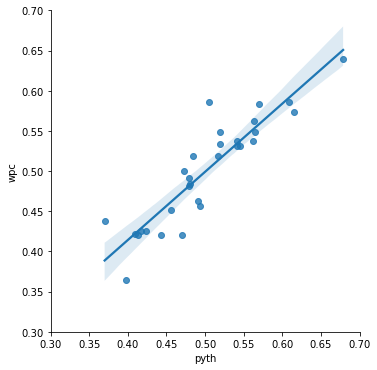

In [77]:
sns.lmplot(x='pyth', y='wpc', data=pred)
plt.xlim(0.3,0.7)
plt.ylim(0.3,0.7)

In [79]:
pred[['pyth','wpc']].corr()

,pyth,wpc
pyth,1.000000,0.906349
wpc,0.906349,1.000000


In [78]:
pyth_lm = smf.ols(formula = 'wpc ~ pyth', data=pred).fit()
pyth_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    wpc   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     128.8
Date:                Wed, 25 Aug 2021   Prob (F-statistic):           5.47e-12
Time:                        17:11:23   Log-Likelihood:                 65.248
No. Observations:                  30   AIC:                            -126.5
Df Residuals:                      28   BIC:                            -123.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0747      0.038      1.974      0.058      -0.003       0.152
pyth           0.8489      0.075     11.351      0.000       0.696       1.002
==============================================================================
Omnibus:                        5.655   Durbin-Watson:                   1.555
Prob(Omnibus):                  0.059   Jarque-Bera (JB):                4.047
Skew:                           0.648   Prob(JB):                        0.132
Kurtosis:                       4.249   Cond. No.                         18.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 관중 수가 많은 구단이 승률이 더 좋을까?

In [92]:
# 홈 경기에서의 관중 수를 측정
att = team.groupby('home_team')[['home_team', 'attendance']].sum()
att = att.reset_index().rename(columns={'home_team': 'team'}).sort_values(by='attendance', ascending=False)
att_wpc = pd.merge(att, rank[['team', 'wpc']], on='team')
att_wpc

,team,attendance,wpc
0,Los Angeles Dodgers,3703312.0,0.562
1,St. Louis Cardinals,3444490.0,0.531
2,Toronto Blue Jays,3392099.0,0.549
3,San Francisco Giants,3365256.0,0.537
4,Chicago Cubs,3232420.0,0.640
5,New York Yankees,3063405.0,0.519
6,Los Angeles Angels of Anaheim,3016142.0,0.457
7,Boston Red Sox,2955434.0,0.574
8,New York Mets,2789602.0,0.537
9,Texas Rangers,2710402.0,0.586


<AxesSubplot:xlabel='attendance', ylabel='wpc'>

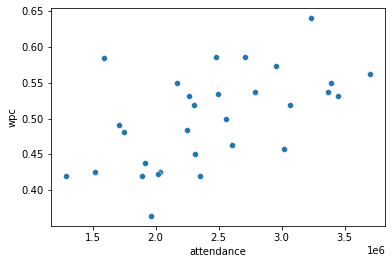

In [95]:
sns.scatterplot(x='attendance', y='wpc', data=att_wpc)

In [96]:
at_wpc = smf.ols(formula = 'wpc ~ attendance', data=att_wpc).fit()
at_wpc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    wpc   R-squared:                       0.309
Model:                            OLS   Adj. R-squared:                  0.284
Method:                 Least Squares   F-statistic:                     12.49
Date:                Wed, 25 Aug 2021   Prob (F-statistic):            0.00144
Time:                        18:14:10   Log-Likelihood:                 44.937
No. Observations:                  30   AIC:                            -85.87
Df Residuals:                      28   BIC:                            -83.07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3573      0.042      8.581      0.000       0.272       0.443
attendance  5.851e-08   1.66e-08      3.535      0.001    2.46e-08    9.24e-08
==============================================================================
Omnibus:                        1.079   Durbin-Watson:                   1.886
Prob(Omnibus):                  0.583   Jarque-Bera (JB):                0.800
Skew:                           0.391   Prob(JB):                        0.670
Kurtosis:                       2.829   Cond. No.                     1.02e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.02e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# LAD의 경기 기록 살펴보기

In [113]:
regular = mlb_16[mlb_16['season']=='regular season']

In [118]:
# 홈 경기
la_home = regular[regular['home_team']=='Los Angeles Dodgers']
print('LAD의 홈경기 {0}승 {1}패, 승률 {2}%'
      .format(la_home.home_team_win.sum(), la_home.home_team_loss.sum(), 100*round(la_home.home_team_win.sum()/la_home.home_team_win.count(),3)))

LAD의 홈경기 53승 28패, 승률 65.4%


In [119]:
# 어웨이 경기
la_away = regular[regular['away_team']=='Los Angeles Dodgers']
print('LAD의 원정경기 {0}승 {1}패, 승률 {2}%'
      .format(la_away.home_team_loss.sum(), la_away.home_team_win.sum(), 100*round(la_away.home_team_loss.sum()/la_away.home_team_loss.count(),3)))

LAD의 원정경기 38승 43패, 승률 46.9%


In [137]:
regular['month'] = pd.to_datetime(regular['date']).dt.month

### 월별 성적

In [144]:
home = la_home[['home_team','away_team', 'home_team_runs', 'away_team_runs', 'date']].rename(columns={'home_team': 'lad',
                                                                                              'away_team': 'opponent',
                                                                                              'home_team_runs': 'lad_runs',
                                                                                              'away_team_runs': 'opp_runs'})
home['win'] = np.where(home['lad_runs']>home['opp_runs'],1,0)
away = la_away[['away_team','home_team', 'away_team_runs', 'home_team_runs', 'date']].rename(columns={'away_team': 'lad',
                                                                                              'home_team': 'opponent',
                                                                                              'away_team_runs': 'lad_runs',
                                                                                              'home_team_runs': 'opp_runs'})
away['win'] = np.where(away['lad_runs']>away['opp_runs'],1,0)

In [157]:
lad_game = pd.concat([home, away])
lad_game = home_away.sort_values(by='date').reset_index().drop('index', axis=1)
lad_game['month'] = pd.to_datetime(lad_game['date']).dt.month
lad_game

,lad,opponent,lad_runs,opp_runs,date,win,month
0,Los Angeles Dodgers,San Diego Padres,15,0,2016-04-04,1,4
1,Los Angeles Dodgers,San Diego Padres,3,0,2016-04-05,1,4
2,Los Angeles Dodgers,San Diego Padres,7,0,2016-04-06,1,4
3,Los Angeles Dodgers,San Francisco Giants,6,12,2016-04-07,0,4
4,Los Angeles Dodgers,San Francisco Giants,2,3,2016-04-08,0,4
...,...,...,...,...,...,...,...
157,Los Angeles Dodgers,San Diego Padres,5,6,2016-09-28,0,9
158,Los Angeles Dodgers,San Diego Padres,9,4,2016-09-29,1,9
159,Los Angeles Dodgers,San Francisco Giants,3,9,2016-09-30,0,9
160,Los Angeles Dodgers,San Francisco Giants,0,3,2016-10-01,0,10


In [188]:
lad_month = lad_game.groupby('month')[['lad_runs', 'opp_runs']].sum().reset_index()
lad_month = lad_month.drop(6)
lad_month['month'] = lad_month['month'].apply(str)
lad_month

,month,lad_runs,opp_runs
0,4,105,97
1,5,124,96
2,6,109,103
3,7,126,94
4,8,132,149
5,9,128,89


In [214]:
lad_monthwin = lad_game.groupby('month')['win'].sum().reset_index()
lad_monthwin = lad_monthwin.drop(6)
lad_monthwin

,month,win
0,4,12
1,5,16
2,6,16
3,7,15
4,8,15
5,9,17


Text(0.5, 0, 'Month')

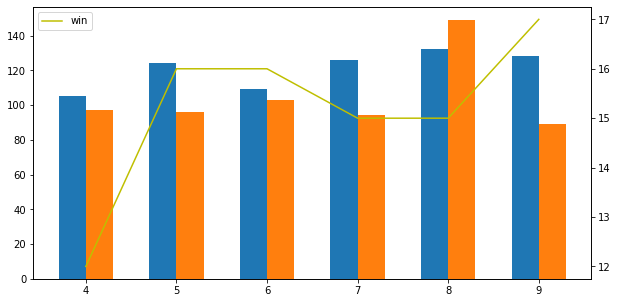

In [225]:
plt.figure(figsize=(10,5))
width=0.15
plt.bar(np.arange(len(lad_month.month))-width, lad_month.lad_runs, width=0.3, label='R')
plt.bar(np.arange(len(lad_month.month))+width, lad_month.opp_runs, width=0.3, label='ER')
lad_monthwin['win'].plot(secondary_y=True, color='y')
plt.xticks(np.arange(len(lad_month.month)), lad_month.month)
plt.legend()
plt.xlabel('Month')